In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Set parameters
beta = 0.99  # Discount factor
sigma = 1  # Elasticity of intertemporal substitution
kappa = 0.1  # Slope of the Phillips curve
phi_pi = 1.5  # Taylor rule coefficient on inflation
phi_y = 0.5  # Taylor rule coefficient on output gap
rho_r = 0.5  # Interest rate shock persistence
#Higher beta leads to more smoothing of consumption over time and less sensitivity to temporary shocks.
#Lower sigma makes consumption more sensitive to interest rate changes.
#Higher kappa leads to larger inflation responses to output fluctuations.
#Higher phi_pi means more aggressive inflation targeting, which can lead to quicker stabilization of inflation but potentially more output volatility.
#Higher phi_y means the central bank puts more weight on stabilizing output, which can lead to more stable output but potentially more inflation volatility.
#Higher rho_r means that interest rate shocks have more lasting effects on the economy.

In [13]:
# Set simulation length and number of simulations
T = 40
n_sims = 1000

In [14]:
# Function to run a single simulation
def run_simulation():
    y = np.zeros(T)
    pi = np.zeros(T)
    r = np.zeros(T)
    
    # Set initial shock
    r[0] = 0.01 + np.random.normal(0, 0.002)  # 1% interest rate shock with some noise
    
    for t in range(1, T):
        r[t] = rho_r * r[t-1] + np.random.normal(0, 0.001)
        y[t] = y[t-1] - (1/sigma) * (r[t-1] - pi[t-1]) + np.random.normal(0, 0.001)
        pi[t] = beta * pi[t-1] + kappa * y[t-1] + np.random.normal(0, 0.001)
    
    return y, pi, r

In [15]:
# Run simulations
all_y = np.zeros((n_sims, T))
all_pi = np.zeros((n_sims, T))
all_r = np.zeros((n_sims, T))

for i in range(n_sims):
    all_y[i], all_pi[i], all_r[i] = run_simulation()

In [16]:
# Calculate means and standard deviations
mean_y, std_y = np.mean(all_y, axis=0), np.std(all_y, axis=0)
mean_pi, std_pi = np.mean(all_pi, axis=0), np.std(all_pi, axis=0)
mean_r, std_r = np.mean(all_r, axis=0), np.std(all_r, axis=0)

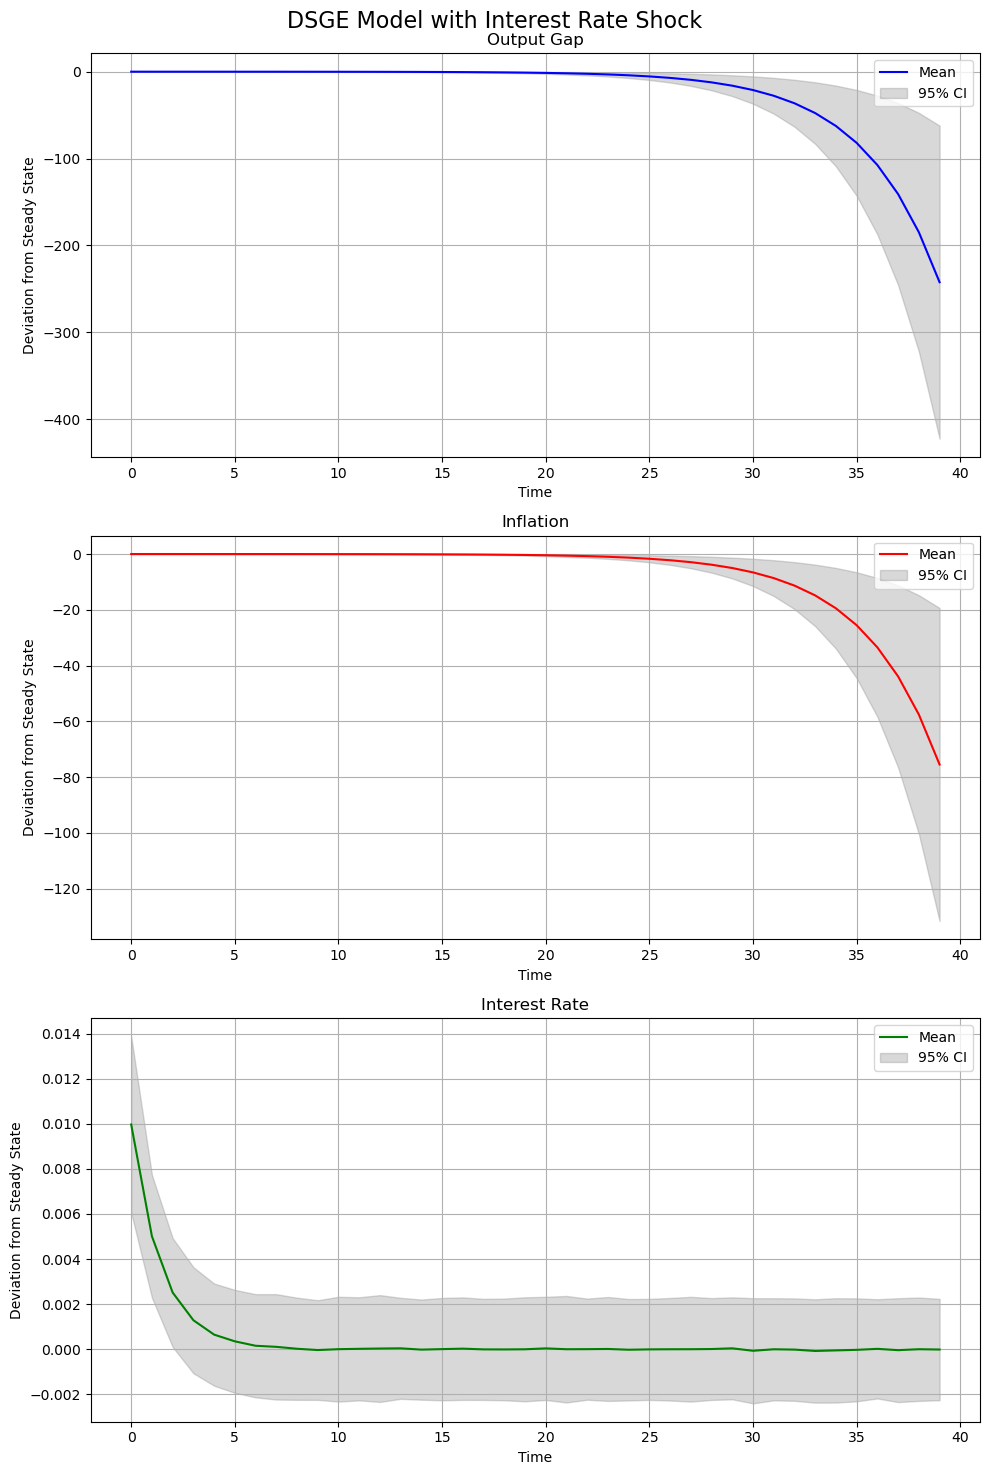

In [17]:
# Plot results
time = range(T)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('DSGE Model with Interest Rate Shock', fontsize=16)

# Plot Output Gap
ax1.plot(time, mean_y, 'b-', label='Mean')
ax1.fill_between(time, mean_y - 1.96*std_y, mean_y + 1.96*std_y, color='gray', alpha=0.3, label='95% CI')
ax1.set_title('Output Gap')
ax1.set_xlabel('Time')
ax1.set_ylabel('Deviation from Steady State')
ax1.legend()
ax1.grid(True)

# Plot Inflation
ax2.plot(time, mean_pi, 'r-', label='Mean')
ax2.fill_between(time, mean_pi - 1.96*std_pi, mean_pi + 1.96*std_pi, color='gray', alpha=0.3, label='95% CI')
ax2.set_title('Inflation')
ax2.set_xlabel('Time')
ax2.set_ylabel('Deviation from Steady State')
ax2.legend()
ax2.grid(True)

# Plot Interest Rate
ax3.plot(time, mean_r, 'g-', label='Mean')
ax3.fill_between(time, mean_r - 1.96*std_r, mean_r + 1.96*std_r, color='gray', alpha=0.3, label='95% CI')
ax3.set_title('Interest Rate')
ax3.set_xlabel('Time')
ax3.set_ylabel('Deviation from Steady State')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()